In [28]:
import numpy as np
import matplotlib.pyplot as plt

def g(H1):
    return θ**n / (θ**n + H1**n)

def f(N1):
    return N1**n/(θ**n + N1**n) 

def euler_maruyama(N10, H10, P10, D10, N20, H20, P20, D20, t0, t_end, dt, μ, b, σ, p):
    num_steps = int((t_end - t0) / dt)
    t = np.linspace(t0, t_end, num_steps + 1)
    N1, H1 = np.zeros(num_steps + 1), np.zeros(num_steps + 1) 
    P1, D1 = np.zeros(num_steps + 1), np.zeros(num_steps + 1) 
    N2, H2 = np.zeros(num_steps + 1), np.zeros(num_steps + 1) 
    P2, D2 = np.zeros(num_steps + 1), np.zeros(num_steps + 1)
    
    N1[0], H1[0], P1[0], D1[0]  = N10, H10, P10, D10
    N2[0], H2[0], P2[0], D2[0]  = N20, H20, P20, D20

    
    
    for i in range(num_steps):
        dW1, dW2 = np.random.normal(0, np.sqrt(dt)), np.random.normal(0, np.sqrt(dt))
        dW3, dW4 = np.random.normal(0, np.sqrt(dt)), np.random.normal(0, np.sqrt(dt))
        dW5, dW6 = np.random.normal(0, np.sqrt(dt)), np.random.normal(0, np.sqrt(dt))
        dW7, dW8 = np.random.normal(0, np.sqrt(dt)), np.random.normal(0, np.sqrt(dt))
        
        N1[i+1] = N1[i] + (-μ*N1[i] + (1 + b) * f(p*D1[i] + (1-p)*D2[i])) * dt + σ * dW1
        H1[i+1] = H1[i] + (-μ*H1[i] + f(N1[i])) * dt + σ * dW2
        P1[i+1] = P1[i] + (-μ*P1[i] + g(H1[i])) * dt + σ * dW3
        D1[i+1] = D1[i] + (-μ*D1[i] + f(P1[i])) * dt + σ * dW4
        
        N2[i+1] = N2[i] + (-μ*N2[i] + f(p*D2[i] + (1-p)*D1[i])) * dt + σ * dW5
        H2[i+1] = H2[i] + (-μ*H2[i] + f(N2[i])) * dt + σ * dW6
        P2[i+1] = P2[i] + (-μ*P2[i] + g(H2[i])) * dt + σ * dW7
        D2[i+1] = D2[i] + (-μ*D2[i] + f(P2[i])) * dt + σ * dW8
        
        
    return t, N1, H1, P1, D1, N2, H2, P2, D2


# Set the parameters

N10, H10, P10, D10, N20, H20, P20, D20 = 0, 0 , 0, 0, 0, 0, 0, 0    
t0 = 0.0       # Initial time
t_end = 120.0   # End time
dt = 0.02      # Time step size
μ = 1.0        # Parameter μ
θ = 0.25
n = 2

σ = 0.03 
b = 0.01
p = 0.15          # Cis interaction parameter




num_runs = 1

A9_reached_target = []
A9_succ_runs = []
A9_tts_list = []


B9_reached_target = []
B9_succ_runs = []
B9_tts_list = []

for run in range(num_runs):
    # Simulate the SDEs
        
    t, N1, H1, P1, D1, N2, H2, P2, D2 = euler_maruyama(N10, H10, P10, D10, N20, H20, P20, D20,
                                                       t0, t_end, dt, μ, b, σ, p)
    
    
    if (np.abs((N1-0.7098)**2 + (H1-0.8896)**2 + (P1-0.0732)**2 + (D1-0.0789)**2 +
               (N2-0.2329)**2 + (H2-0.4646)**2 + (P2-0.2245)**2 + (D2-0.4465)**2)< 0.01).any():
        A9_reached_target.append(run)
        
    elif (np.abs((N1-0.2338)**2 + (H1-0.4669)**2 + (P1-0.2230)**2 + (D1-0.4431)**2 +
                 (N2-0.7033)**2 + (H2-0.8878)**2 + (P2-0.0735)**2 + (D2-0.0795)**2)< 0.01).any():
        B9_reached_target.append(run)
        
    else:
        continue
 
 

    A9_tts = t[np.argmax(np.abs((N1-0.7098)**2 + (H1-0.8896)**2 + (P1-0.0732)**2 + (D1-0.0789)**2 +
                                (N2-0.2329)**2 + (H2-0.4646)**2 + (P2-0.2245)**2 + (D2-0.4465)**2) < 0.01)]
                             
    A9_tts_list.append(A9_tts)
    
    
    B9_tts = t[np.argmax(np.abs((N1-0.2338)**2 + (H1-0.4669)**2 + (P1-0.2230)**2 + (D1-0.4431)**2 +
                                (N2-0.7033)**2 + (H2-0.8878)**2 + (P2-0.0735)**2 + (D2-0.0795)**2)< 0.01)]
                             
    B9_tts_list.append(B9_tts)
    

#Keeping succesful runs
A9_succ_runs.append(len(A9_reached_target))
B9_succ_runs.append(len(B9_reached_target))
 
#Calculating and keeping accuracy
A9_accuracy = len(A9_reached_target)/num_runs
B9_accuracy = len(B9_reached_target)/num_runs

#GLOBAL_ACCURACY.append(A9_accuracy)
#B_ACCURACY.append(B9_accuracy)

#Mean and standard deviation
#A9_mean = np.mean(A9_tts_list)
#GLOBAL_tts_MEAN.append(A9_mean)

#A9_std = np.std(A9_tts_list)
#GLOBAL_tts_STD.append(A9_std)

#GLOBAL_p_Values.append(p)
        
print(A9_accuracy)



1.0


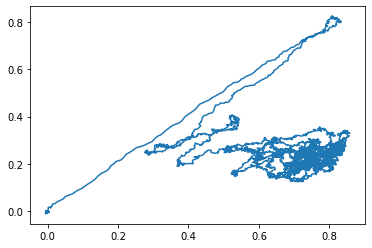

In [29]:
plt.plot(N1,N2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


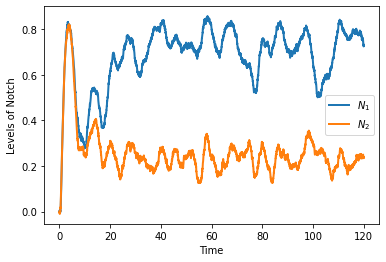

In [31]:
plt.plot(t,N1, lw=2, label=r'$N_1$')
plt.plot(t,N2, lw=2, label=r'$N_2$')

plt.xlabel('Time')
plt.ylabel('Levels of Notch')
plt.legend()
plt.savefig('go.eps', format='eps')
plt.show()   